Używane biblioteki

In [7]:
import math
import matplotlib.pyplot as plt
import numpy as np

Interpolacja Hermite'a

Zakladam, ze input jest postaci

xs = [x1, x2, x3, x4, ...]
ys = [ [y1, y1', y1'', ...], ... ], czyli do kazdego x-a przypisana jest lista y-ów, z której każdy kolejny oznacza wartość w kolejnej pochodnej

In [2]:
#Funkcja pomocnicza do wypisywania macierzy z wartościami
def pretty_print(array):
    
    for row in array:
        for el in row:
            print(el, end = ' ')
        print("")

In [4]:
def hermite_interpolation(xs, ys, x):

    #Tworzy wektor z wartośami [x1, x1, x1, x2, x2, ...], gdzie ilośc xi to ilość wartości funkcji i pochodnych dla danego x-a
    x_map = []
    for i, mi in enumerate(ys):
        for _ in range(len(mi)):
            x_map.append(xs[i])

    #Wyznaczam sumę krotności
    m = sum([len(mi) for mi in ys])
    
    #Tworzę początkową macierz
    A = [[ None for j in range(m)] for i in range(m)]
    
    #Wypełniam macierz znanym wartościami f(x)
    current_row = 0
    for mi in ys:
        for j in range(len(mi)):
            A[current_row][0] = mi[0]
            current_row += 1
            
    #Wypełniam macierz znanymi wartościami pochodnych
    row = 0
    for mi in ys:
        for i in range(len(mi)):
            for j in range(1, i + 1):
                A[row][j] = mi[j] / math.factorial(j)
            row += 1
            
    #Wypełniam macierz wylioczonymi różnicami i wyliczam wspolczynniki
    coefficients = [A[0][0]]
    for i in range(1, m): #Aktualna pozycja do ktorej zmierzamy
        for j in range(1, i + 1):
            if A[i][j] == None:
                A[i][j] = (A[i][j - 1] - A[i - 1][j - 1]) / (x_map[i] - x_map[i - j])
        coefficients.append(A[i][i])
        
    #pretty_print(A)
    
    diffs = [x - xi for xi in x_map]
    
    w = coefficients[0]
    
    for i in range(1, m):
        
        temp = coefficients[i]
        
        for j in range(0, i):
            temp *= diffs[j]
            
        w += temp
        
    return w  

Równomiernie rozprowadzone punkty

In [5]:
#return evenly distrubuted x arguments on [a, b]
def get_evenly_distributed(a, b, n = 100):
    
    length = abs(b - a)
    h = length / (n - 1)
    
    return [a + i * h for i in range(n - 1)] + [b]

Zera wielomianu Czebyszewa - Inaczej węzły Czebyszewa. Są często używane jako węzły w interpolacji wielomianowej,
ponieważ wynikowy wielomian interpolacyjny minimalizuje efekt Rungego, czyli duże oscylacje wielomianu interpolacyjnego przy krańcach przedziału.

Reference: https://pl.wikipedia.org/wiki/W%C4%99z%C5%82y_Czebyszewa

In [6]:
def get_chebyshev_nodes(a, b, n):

    nodes = []

    for k in range(1, n + 1): #n + 1, because range is exclusive on the right side

        nodes.append( 0.5 * (a + b) + 0.5 * (b - a) *  math.cos( ( (2 * k - 1) / (2 * n) ) * math.pi ) )
    
    return nodes[::-1] #Flipping an array in order to it being consistent with input range

Rysowanie wykresu funkcji zadanej wzorem

In [30]:
def plot_function(func, range_a, range_b, func_x = None):
    
    if func_x == None:
        func_x = np.linspace(range_a, range_b, 10000)
        
    func_y = [func(func_x[i]) for i in range(len(func_x))]

    plt.plot(func_x, func_y, label = "Zadana funkcja", color = 'blue')

    plt.legend()
    plt.grid(True)
    #plt.savefig("zadana_funkcja.png")

Zadana funkcja

f(x) = 10 * m + x^2 / k - 10 * m * cos(kx)

k = 1.5
m = 3
x z przedzialu [-4pi, 4pi]

In [31]:
f_range_a = -4 * math.pi
f_range_b = 4 * math.pi

In [32]:
def f(x):
    return 30 + (x**2 / 1.5) - 30 * math.cos(1.5 * x)

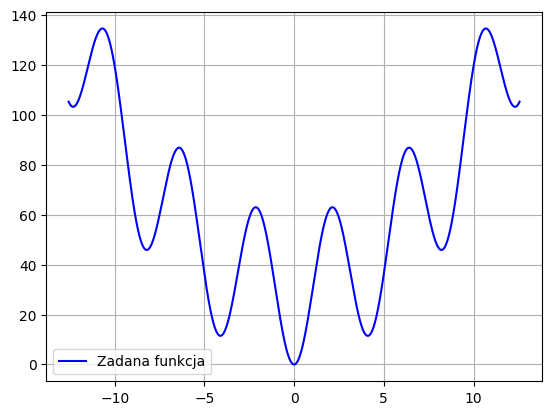

In [33]:
plot_function(f, f_range_a, f_range_b)
plt.show()

Pierwsza pochodna funkcji f(x)

g(x) = f'(x) = 45 * sin(1.5 * x) + 4x / 3

In [34]:
def g(x):
    return 45 * math.sin(1.5 * x) + ( (4 * x) / 3)

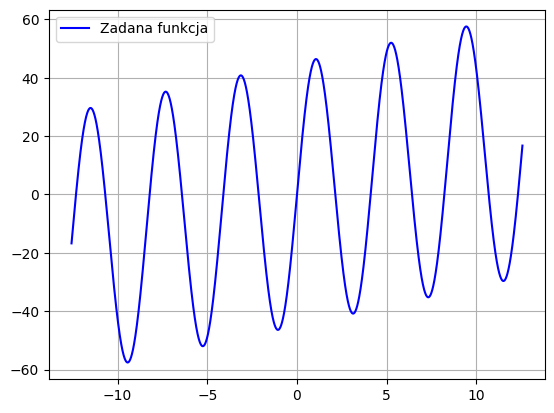

In [35]:
plot_function(g, f_range_a, f_range_b)
plt.show()

Druga pochodna funkcji f(x)

h(x) = g'(x) = f''(x) = (405 * cos(1.5 * x) + 8) / 6

In [36]:
def h(x):
    return (405 * math.cos(1.5 * x) + 8) / 6

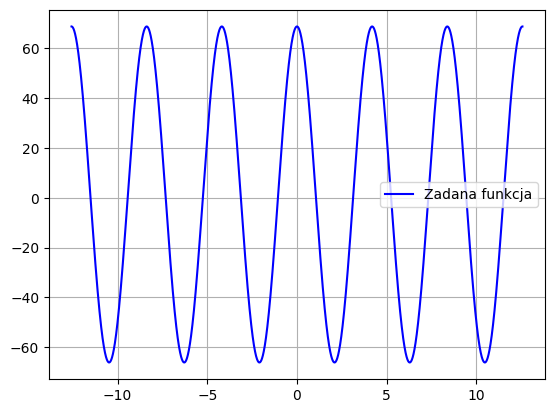

In [37]:
plot_function(h, f_range_a, f_range_b)
plt.show()

Interpolacja

In [38]:
def interpolate(point_generation_function, n, test_points_count, nodes_plot_label = 'Węzły'):
    
    xs = point_generation_function(f_range_a, f_range_b, n)
    
    ys = [ (f(xs[i]), g(xs[i]), h(xs[i])) for i in range(len(xs))]

    check_x = get_evenly_distributed(f_range_a, f_range_b, test_points_count)
    check_y = []

    for i in range(len(check_x)):

        check_y.append(hermite_interpolation(xs, ys, check_x[i]))

    plot_function(f, f_range_a, f_range_b)
    plt.plot(check_x, check_y, color = 'red', label = "Funkcja interpolująca")
    #plt.scatter(xs, ys, color = 'black', label=nodes_plot_label)
    
    plt.legend()
    plt.grid(True)
    #plt.savefig("interpolacja.png")
    plt.show()


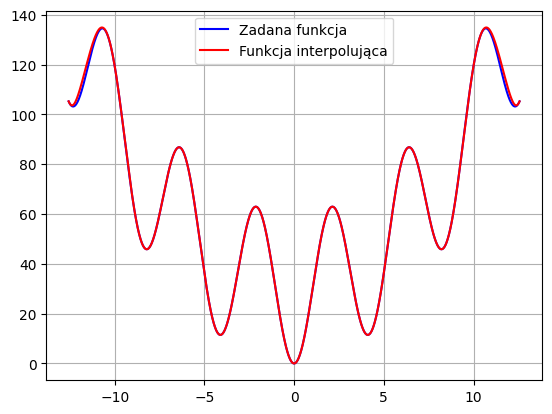

In [60]:
interpolate(get_evenly_distributed, 10, 1000)

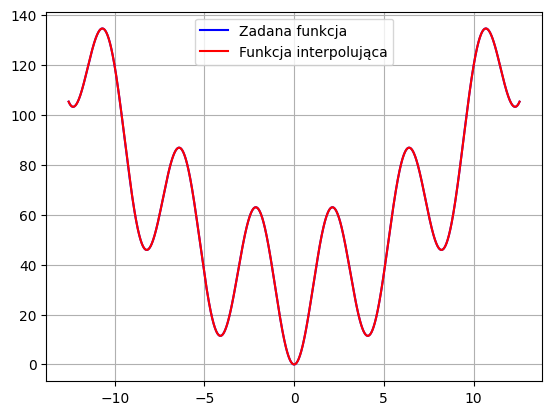

In [61]:
interpolate(get_chebyshev_nodes, 10, 1000)